Question 11

Load Boston Housing Dataset. Apply K-Means clustering to group neighborhoods based on their housing features. Determine the optimal kkk using the Silhouette score and elbow methods. Interpret the clusters. What patterns or insights can you observe? Add some outliers to the dataset artificially. Perform clustering before and after adding outliers. How do outliers impact the K-Means clustering results?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "3"

In [5]:
df=pd.read_csv(r"C:\Users\SASWATA\OneDrive\Desktop\ML_PRAC\ML_PRAC\Housing.csv")

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
cols_to_encode=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

In [12]:
for i in cols_to_encode:
    df[i]=le.fit_transform(df[i])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scale=StandardScaler()

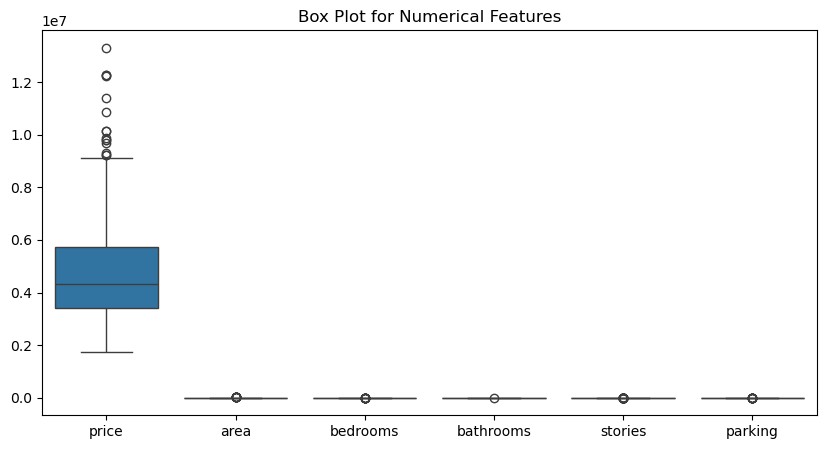

In [15]:
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_features])
plt.title('Box Plot for Numerical Features')
plt.show()

In [16]:
df2=df

In [17]:
df1=scale.fit_transform(df)

In [18]:
from sklearn.cluster import KMeans

In [19]:
clusters=[i for i in range(2,11)]

In [20]:
d={'cluster':[],'inertia':[]}
for i in clusters:
    km=KMeans(n_clusters=i)
    km.fit(df1)
    d['cluster'].append(i)
    d['inertia'].append(km.inertia_)
d

{'cluster': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'inertia': [5891.293922962536,
  5423.696909567916,
  5100.7536294881775,
  4576.804060860997,
  4383.868032754831,
  3950.532505725091,
  3852.499830661627,
  3646.2235518826637,
  3508.497800317278]}

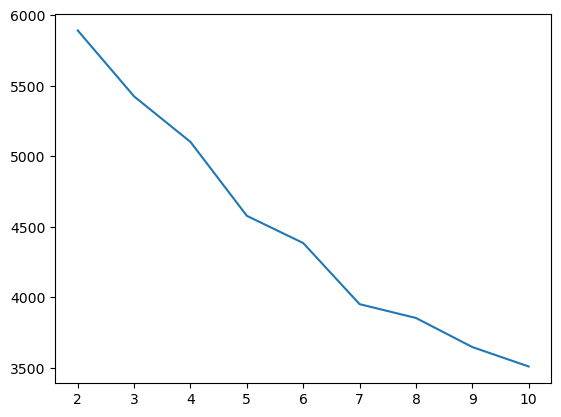

In [21]:
plt.plot(d['cluster'],d['inertia'])

In [22]:
from sklearn.metrics import silhouette_score
d={'cluster':[],'silhouette_score':[]}
for i in clusters:
    km=KMeans(n_clusters=i)
    km.fit(df1)
    d['cluster'].append(i)
    d['silhouette_score'].append(silhouette_score(df1, km.predict(df1)))
d

{'cluster': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'silhouette_score': [0.19114985713170346,
  0.1820167547743343,
  0.17209473890199425,
  0.1219038708786696,
  0.14994616911345576,
  0.14045914675806193,
  0.14510111708444332,
  0.14720759851330423,
  0.13593020927986135]}

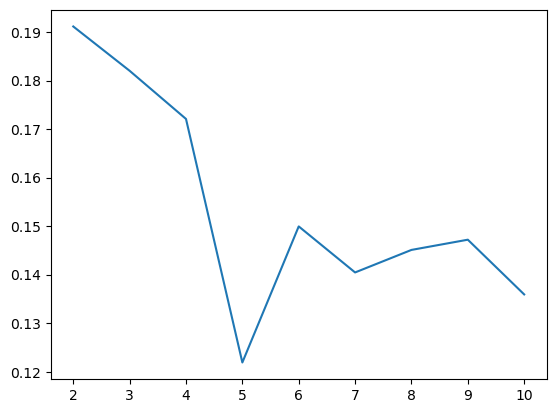

In [23]:
plt.plot(d['cluster'],d['silhouette_score'])

In [24]:
optimal_k=4

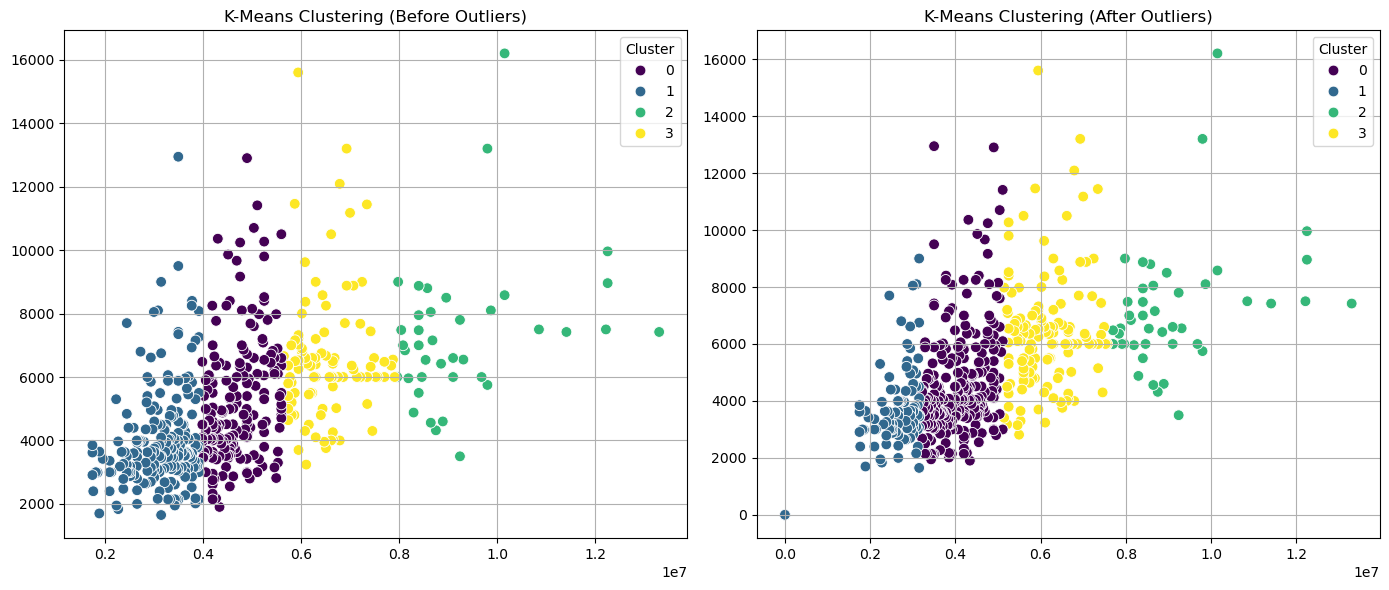

In [25]:
# Add clusters to the original dataset
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df.values)

# Add outliers to the dataset
np.random.seed(42)
n_outliers = 20

outliers = np.random.uniform(low=-5, high=5, size=(n_outliers, df.shape[1] - 1))  # Exclude the 'Cluster' column
X_outliers_added = np.vstack([df.drop(columns=['Cluster']).values, outliers])

# Apply K-Means on the data with outliers
kmeans_with_outliers = KMeans(n_clusters=optimal_k, random_state=42)
df_with_outliers = pd.DataFrame(X_outliers_added, columns=df.columns[:-1])  # Exclude 'Cluster' column for the outliers
df_with_outliers['Cluster'] = kmeans_with_outliers.fit_predict(X_outliers_added)

# Compare clustering before and after adding outliers
plt.figure(figsize=(14, 6))

# Before outliers
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=df.values[:, 0],
    y=df.values[:, 1],
    hue=df['Cluster'],
    palette='viridis',
    s=60
)
plt.title('K-Means Clustering (Before Outliers)')
plt.legend(title='Cluster')
plt.grid()

# After adding outliers
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=X_outliers_added[:, 0],
    y=X_outliers_added[:, 1],
    hue=df_with_outliers['Cluster'],
    palette='viridis',
    s=60
)
plt.title('K-Means Clustering (After Outliers)')
plt.legend(title='Cluster')
plt.grid()

plt.tight_layout()
plt.show()